# <span style="font-variant:small-caps;"><font color=#DAA6E4 size=12>BDT Variable Exploration</font></span>

This notebook should present the distributions of signal and data within control regions.

[This link](https://cms-analysis.github.io/HiggsAnalysis-CombinedLimit/part2/settinguptheanalysis/) will show you how to format the data cards and enter them into HiggsCombine.

In [ ]:
datTree = Tree(JetHT_Data_UL)
datTree.initialize_t6_X()

X = datTree.t6_X

In [ ]:
cut_6jNN = 0

# edges of mH windows
SR_edge = 25 # GeV
VR_edge = 60 # GeV
CR_edge = 120 # GeV

In [ ]:
mH = 125 # GeV

SR_lo = mH - SR_edge
SR_hi = mH + SR_edge

VR_lo = mH - VR_edge
VR_hi = mH + VR_edge

CR_lo = mH - CR_edge
CR_hi = mH + CR_edge

In [ ]:
dat_6sums = ak.sum(datTree.t6_jet_btag, axis=1)/6

In [ ]:
#### DATA ####
dat_6jNN_mask = datTree.b_6j_score > cut_6jNN # pass 6jNN mask

# dat_m_cand = datTree.t6_higgs_m[:,2]
dat_Dm_cand = abs(datTree.t6_higgs_m - 125)
dat_Dm      = datTree.t6_higgs_m - 125
dat_Dm_pos  = ak.all(datTree.t6_higgs_m - 125 > 0, axis=1)
dat_Dm_neg  = ak.all(datTree.t6_higgs_m - 125 < 0, axis=1)

# triple mass veto
dat_SR = ak.all(dat_Dm_cand <= SR_edge, axis=1) # SR
dat_VR = ak.all(dat_Dm_cand > SR_edge, axis=1) & ak.all(dat_Dm_cand <= VR_edge, axis=1) # VR
dat_CR = ak.all(dat_Dm_cand > VR_edge, axis=1) # CR

In [ ]:
nbins = 60
mBins = np.linspace(0,2000,nbins)

In [ ]:
score_cut = 0.66

#### DATA ####
# score veto
dat_ls_mask = ak.sum(datTree.t6_jet_btag, axis=1)/6 < score_cut # ls
dat_hs_mask = ak.sum(datTree.t6_jet_btag, axis=1)/6 >= score_cut # hs

# combination
dat_CRls_mask = dat_6jNN_mask & dat_CR & dat_ls_mask
dat_CRhs_mask = dat_6jNN_mask & dat_CR & dat_hs_mask
dat_VRls_mask = dat_6jNN_mask & dat_VR & dat_ls_mask
dat_VRhs_mask = dat_6jNN_mask & dat_VR & dat_hs_mask
dat_SRls_mask = dat_6jNN_mask & dat_SR & dat_ls_mask

In [ ]:
TF = ak.sum(dat_CRhs_mask)/ak.sum(dat_CRls_mask)
TF

0.18360849056603773

In [ ]:
from hep_ml import reweight
from pandas import DataFrame

In [ ]:
dat_crls_H1_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,0][dat_CRls_mask].to_numpy()
dat_crls_H1_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,1][dat_CRls_mask].to_numpy()
dat_crls_H2_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,0][dat_CRls_mask].to_numpy()
dat_crls_H2_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,1][dat_CRls_mask].to_numpy()
dat_crls_H3_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,0][dat_CRls_mask].to_numpy()
dat_crls_H3_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,1][dat_CRls_mask].to_numpy()
dat_crls_H1_pt = datTree.t6_higgs_pt[:,0][dat_CRls_mask].to_numpy()
dat_crls_H2_pt = datTree.t6_higgs_pt[:,1][dat_CRls_mask].to_numpy()
dat_crls_H3_pt = datTree.t6_higgs_pt[:,2][dat_CRls_mask].to_numpy()
dat_crls_H1_eta = datTree.t6_higgs_eta[:,0][dat_CRls_mask].to_numpy()
dat_crls_H2_eta = datTree.t6_higgs_eta[:,1][dat_CRls_mask].to_numpy()
dat_crls_H3_eta = datTree.t6_higgs_eta[:,2][dat_CRls_mask].to_numpy()
dat_crls_H1_dr = datTree.t6_higgs_dr[:,0][dat_CRls_mask].to_numpy()
dat_crls_H2_dr = datTree.t6_higgs_dr[:,1][dat_CRls_mask].to_numpy()
dat_crls_H3_dr = datTree.t6_higgs_dr[:,2][dat_CRls_mask].to_numpy()

dat_crhs_H1_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,0][dat_CRhs_mask].to_numpy()
dat_crhs_H1_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,1][dat_CRhs_mask].to_numpy()
dat_crhs_H2_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,0][dat_CRhs_mask].to_numpy()
dat_crhs_H2_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,1][dat_CRhs_mask].to_numpy()
dat_crhs_H3_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,0][dat_CRhs_mask].to_numpy()
dat_crhs_H3_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,1][dat_CRhs_mask].to_numpy()
dat_crhs_H1_pt = datTree.t6_higgs_pt[:,0][dat_CRhs_mask].to_numpy()
dat_crhs_H2_pt = datTree.t6_higgs_pt[:,1][dat_CRhs_mask].to_numpy()
dat_crhs_H3_pt = datTree.t6_higgs_pt[:,2][dat_CRhs_mask].to_numpy()
dat_crhs_H1_eta = datTree.t6_higgs_eta[:,0][dat_CRhs_mask].to_numpy()
dat_crhs_H2_eta = datTree.t6_higgs_eta[:,1][dat_CRhs_mask].to_numpy()
dat_crhs_H3_eta = datTree.t6_higgs_eta[:,2][dat_CRhs_mask].to_numpy()
dat_crhs_H1_dr = datTree.t6_higgs_dr[:,0][dat_CRhs_mask].to_numpy()
dat_crhs_H2_dr = datTree.t6_higgs_dr[:,1][dat_CRhs_mask].to_numpy()
dat_crhs_H3_dr = datTree.t6_higgs_dr[:,2][dat_CRhs_mask].to_numpy()

dat_vrls_H1_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,0][dat_VRls_mask].to_numpy()
dat_vrls_H1_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,1][dat_VRls_mask].to_numpy()
dat_vrls_H2_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,0][dat_VRls_mask].to_numpy()
dat_vrls_H2_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,1][dat_VRls_mask].to_numpy()
dat_vrls_H3_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,0][dat_VRls_mask].to_numpy()
dat_vrls_H3_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,1][dat_VRls_mask].to_numpy()
dat_vrls_H1_pt = datTree.t6_higgs_pt[:,0][dat_VRls_mask].to_numpy()
dat_vrls_H2_pt = datTree.t6_higgs_pt[:,1][dat_VRls_mask].to_numpy()
dat_vrls_H3_pt = datTree.t6_higgs_pt[:,2][dat_VRls_mask].to_numpy()
dat_vrls_H1_eta = datTree.t6_higgs_eta[:,0][dat_VRls_mask].to_numpy()
dat_vrls_H2_eta = datTree.t6_higgs_eta[:,1][dat_VRls_mask].to_numpy()
dat_vrls_H3_eta = datTree.t6_higgs_eta[:,2][dat_VRls_mask].to_numpy()
dat_vrls_H1_dr = datTree.t6_higgs_dr[:,0][dat_VRls_mask].to_numpy()
dat_vrls_H2_dr = datTree.t6_higgs_dr[:,1][dat_VRls_mask].to_numpy()
dat_vrls_H3_dr = datTree.t6_higgs_dr[:,2][dat_VRls_mask].to_numpy()

dat_vrhs_H1_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,0][dat_VRhs_mask].to_numpy()
dat_vrhs_H1_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,1][dat_VRhs_mask].to_numpy()
dat_vrhs_H2_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,0][dat_VRhs_mask].to_numpy()
dat_vrhs_H2_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,1][dat_VRhs_mask].to_numpy()
dat_vrhs_H3_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,0][dat_VRhs_mask].to_numpy()
dat_vrhs_H3_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,1][dat_VRhs_mask].to_numpy()
dat_vrhs_H1_pt = datTree.t6_higgs_pt[:,0][dat_VRhs_mask].to_numpy()
dat_vrhs_H2_pt = datTree.t6_higgs_pt[:,1][dat_VRhs_mask].to_numpy()
dat_vrhs_H3_pt = datTree.t6_higgs_pt[:,2][dat_VRhs_mask].to_numpy()
dat_vrhs_H1_eta = datTree.t6_higgs_eta[:,0][dat_VRhs_mask].to_numpy()
dat_vrhs_H2_eta = datTree.t6_higgs_eta[:,1][dat_VRhs_mask].to_numpy()
dat_vrhs_H3_eta = datTree.t6_higgs_eta[:,2][dat_VRhs_mask].to_numpy()
dat_vrhs_H1_dr = datTree.t6_higgs_dr[:,0][dat_VRhs_mask].to_numpy()
dat_vrhs_H2_dr = datTree.t6_higgs_dr[:,1][dat_VRhs_mask].to_numpy()
dat_vrhs_H3_dr = datTree.t6_higgs_dr[:,2][dat_VRhs_mask].to_numpy()

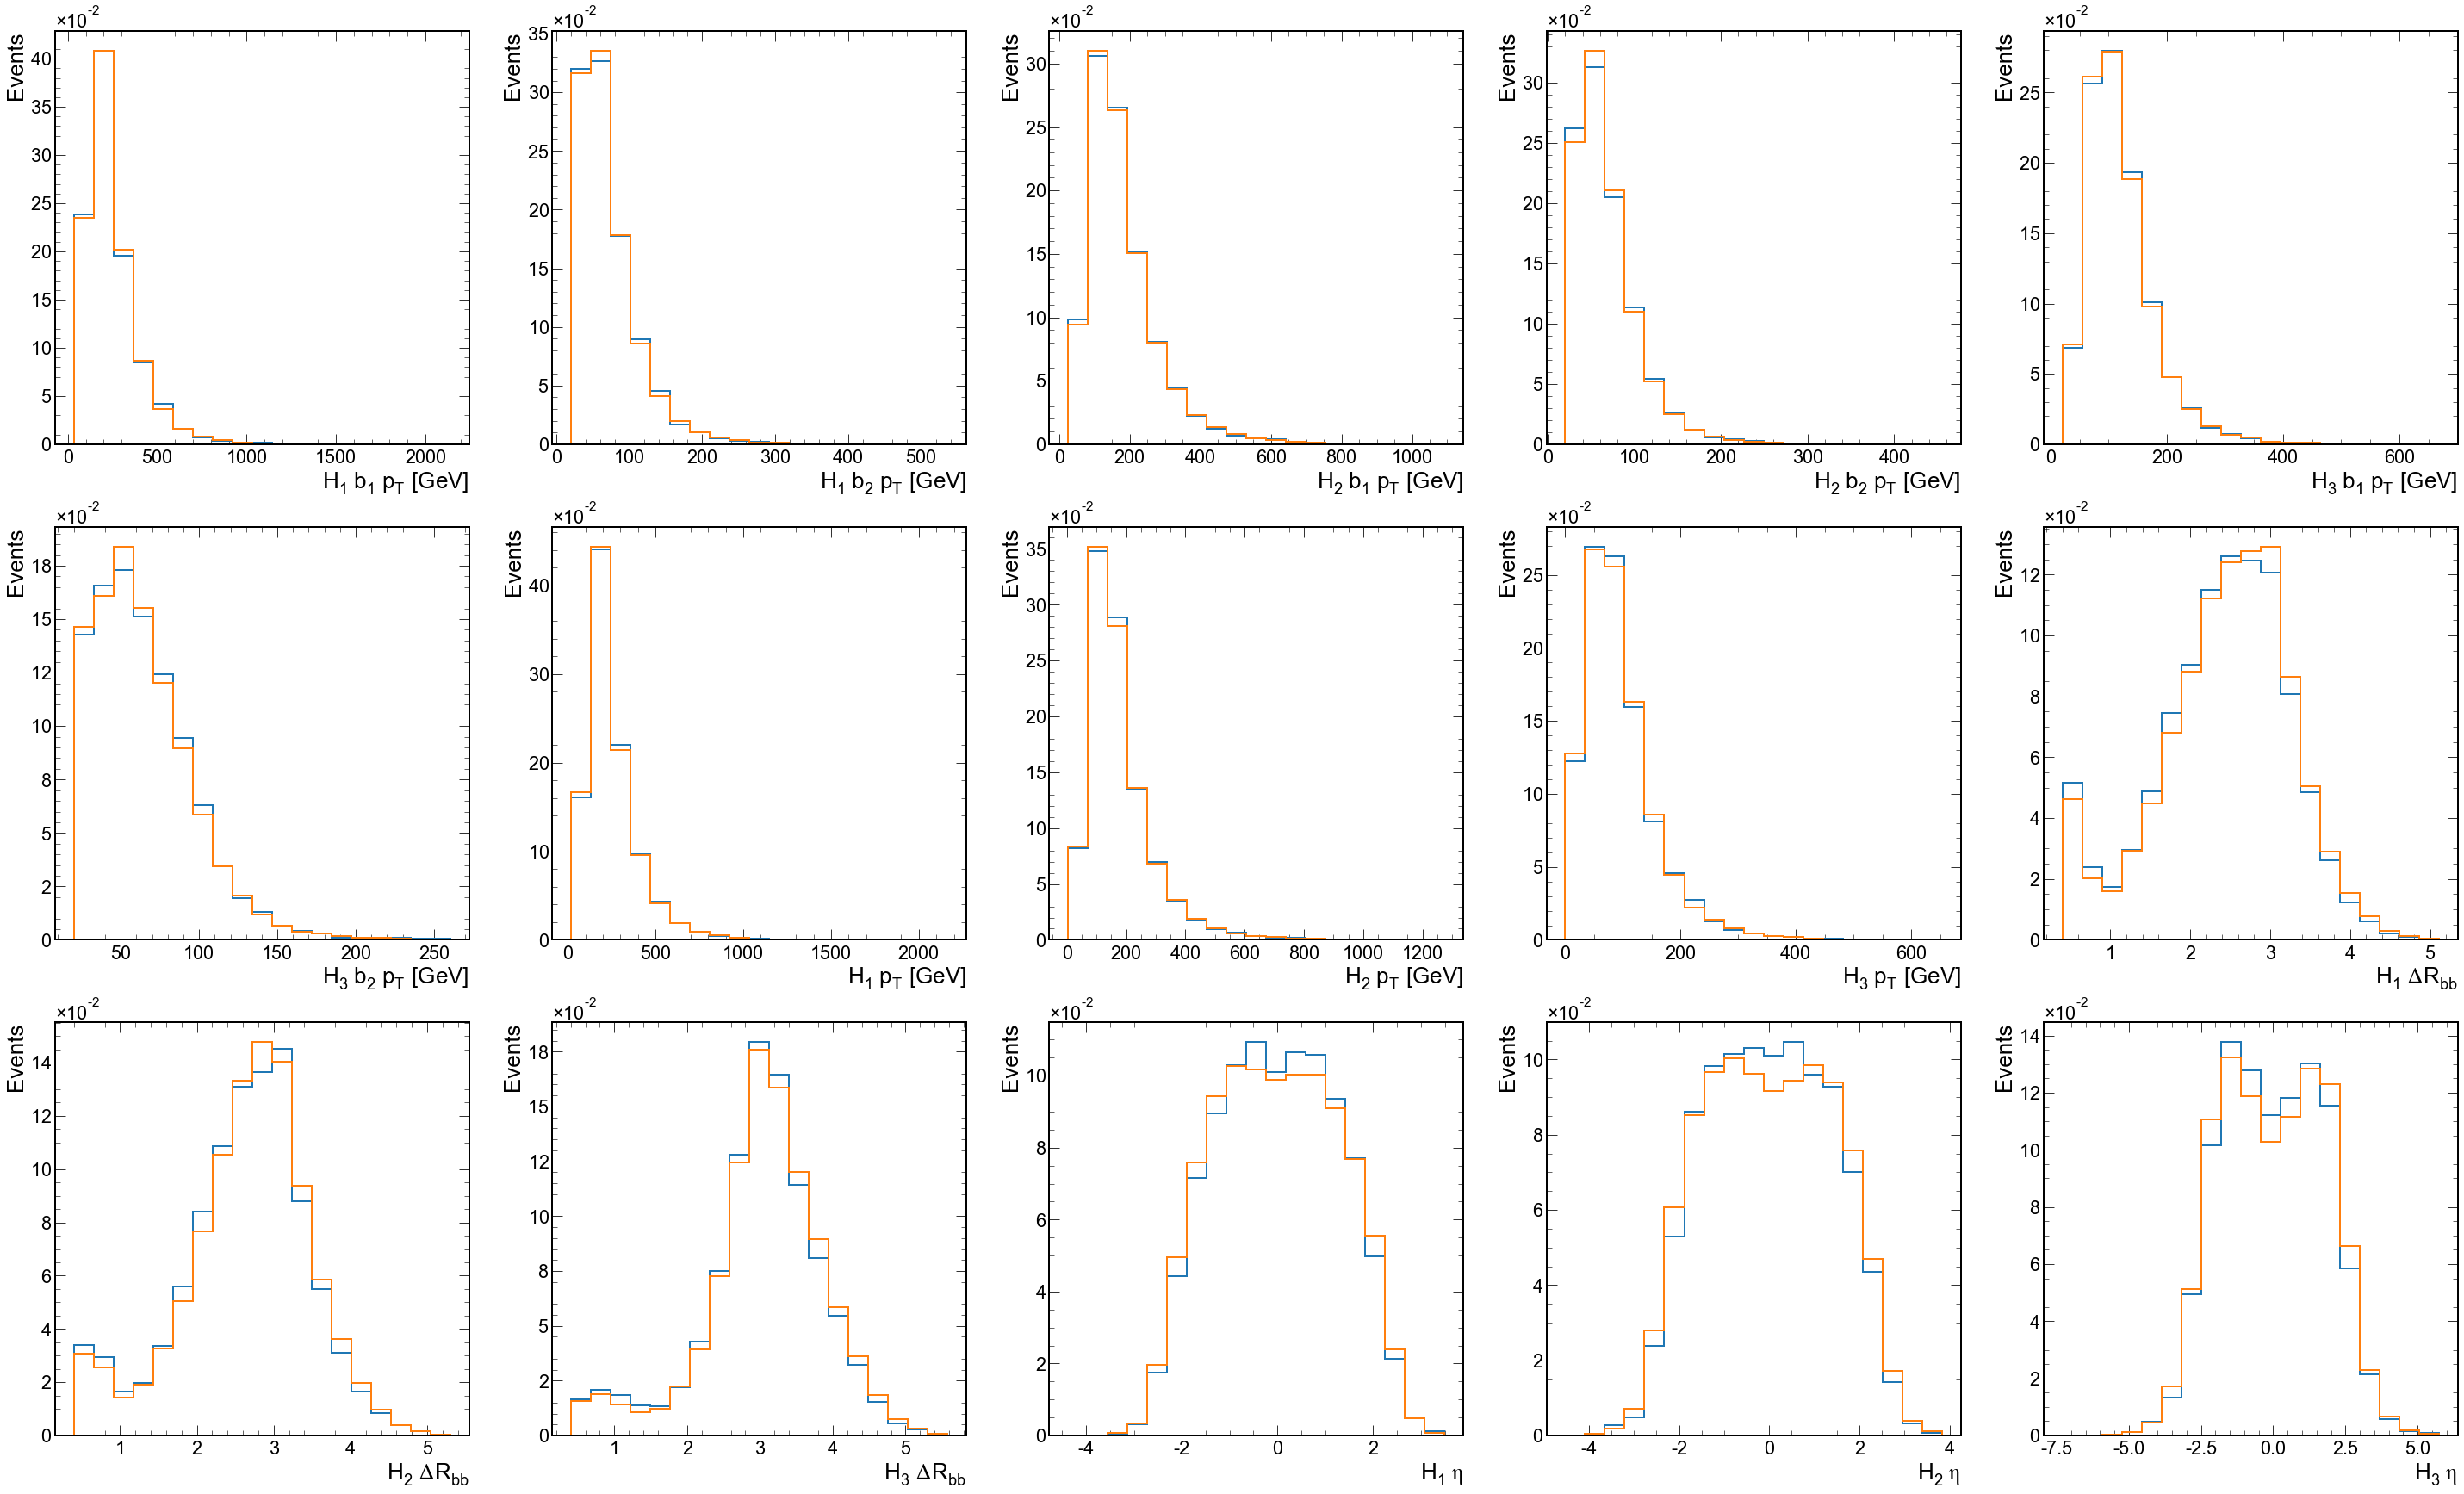

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(50,30))

crls_vars = [dat_crls_H1_b1_pt, dat_crls_H1_b2_pt, dat_crls_H2_b1_pt, dat_crls_H2_b2_pt, dat_crls_H3_b1_pt, dat_crls_H3_b2_pt, dat_crls_H1_pt, dat_crls_H2_pt, dat_crls_H3_pt,dat_crls_H1_dr, dat_crls_H2_dr, dat_crls_H3_dr,dat_crls_H1_eta, dat_crls_H2_eta, dat_crls_H3_eta]
crhs_vars = [dat_crhs_H1_b1_pt, dat_crhs_H1_b2_pt, dat_crhs_H2_b1_pt, dat_crhs_H2_b2_pt, dat_crhs_H3_b1_pt, dat_crhs_H3_b2_pt, dat_crhs_H1_pt, dat_crhs_H2_pt, dat_crhs_H3_pt,dat_crhs_H1_dr, dat_crhs_H2_dr, dat_crhs_H3_dr,dat_crhs_H1_eta, dat_crhs_H2_eta, dat_crhs_H3_eta]
labels = [r'$H_1 \;b_1\; p_T$ [GeV]',
          r'$H_1 \;b_2\; p_T$ [GeV]',
          r'$H_2 \;b_1\; p_T$ [GeV]',
          r'$H_2 \;b_2\; p_T$ [GeV]',
          r'$H_3 \;b_1\; p_T$ [GeV]',
          r'$H_3 \;b_2\; p_T$ [GeV]',
          r'$H_1 \;p_T$ [GeV]',
          r'$H_2 \;p_T$ [GeV]',
          r'$H_3 \;p_T$ [GeV]',
          r'$H_1 \;\Delta R_{bb}$',
          r'$H_2 \;\Delta R_{bb}$',
          r'$H_3 \;\Delta R_{bb}$',
          r'$H_1 \;\eta$',
          r'$H_2 \;\eta$',
          r'$H_3 \;\eta$']

for crhs,crls,label,ax in zip(crhs_vars,crls_vars,labels,axs.flatten()):

    xmin = min(ak.min(crhs),ak.min(crls))
    xmax = max(ak.max(crhs),ak.max(crhs))

    n,e = Hist(crhs, bins=np.linspace(xmin, xmax, 20), ax=ax, density=1, label='Target')
    n,e = Hist(crls, bins=np.linspace(xmin, xmax, 20), ax=ax, density=1, label='CR ls')

    ax.set_xlabel(label)
    ax.set_ylabel('Events')

fig.savefig("plots/MX700_MY400/BDT_vars.pdf", bbox_inches='tight')